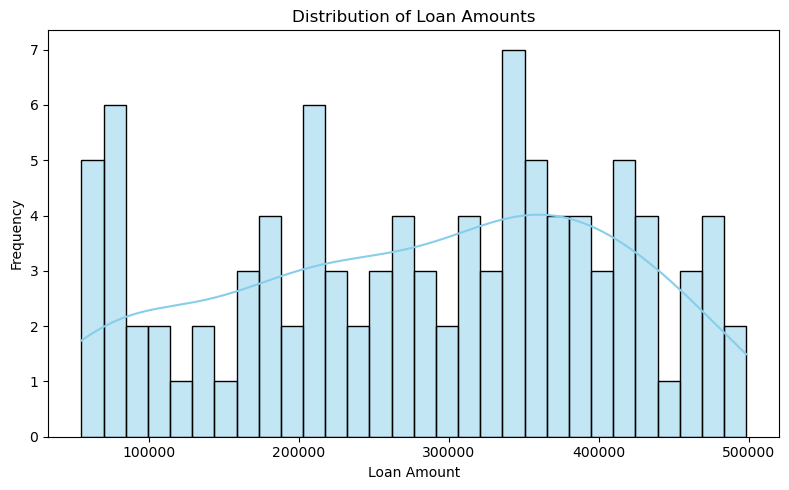

In [1]:
#Loan Amount Distribution (Histogram) - Shows how loan amounts are spread across all customers.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loans = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/loans_medium.csv')

plt.figure(figsize=(8,5))
sns.histplot(loans['loan_amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


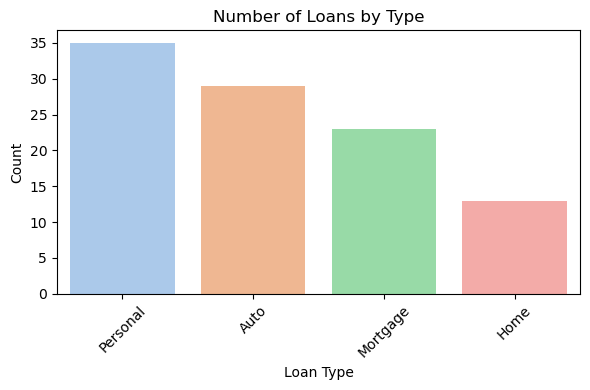

In [2]:
# Number of Loans per Loan Type (Bar Chart) - Compares how many loans were taken under each loan type.
plt.figure(figsize=(6,4))
sns.countplot(x='loan_type', data=loans, palette='pastel')
plt.title('Number of Loans by Type')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


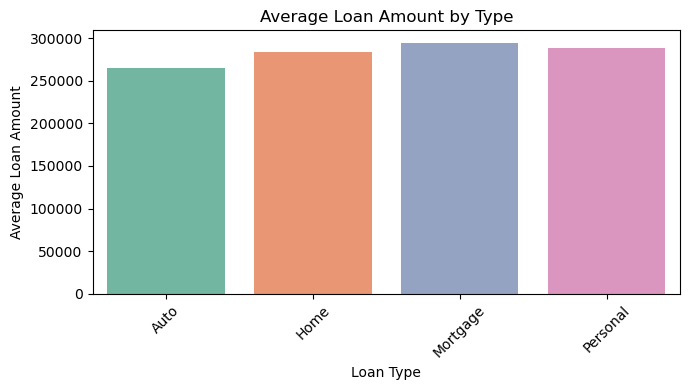

In [3]:
#Average Loan Amount by Loan Type (Bar Chart) - Helpful to compare loan value across categories.
avg_loan = loans.groupby('loan_type')['loan_amount'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(x='loan_type', y='loan_amount', data=avg_loan, palette='Set2')
plt.title('Average Loan Amount by Type')
plt.xlabel('Loan Type')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [6]:
print(payments.columns)


Index(['loan_id', 'customer_id', 'loan_amount', 'loan_type', 'interest_rate',
       'term_months', 'approval_status'],
      dtype='object')


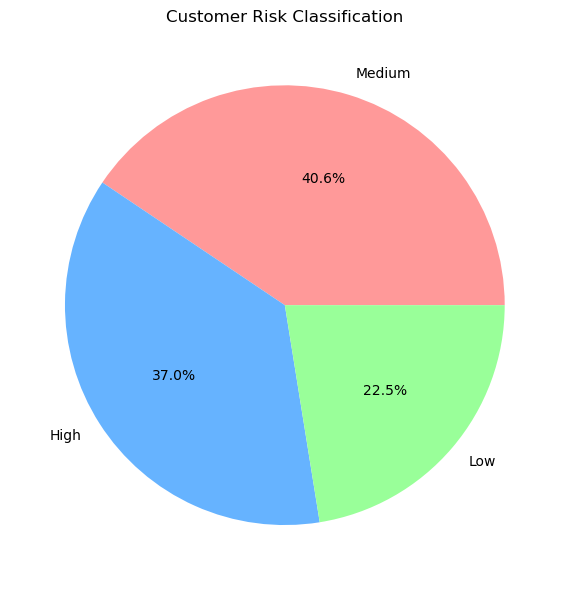

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
customers = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/customers_medium.csv')
loans = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/loans_medium.csv')

# Merge data
merged = customers.merge(loans, on='customer_id', how='left')

# Simple rule-based risk classification
merged['risk'] = merged.apply(
    lambda x: 'High' if x['credit_score'] < 600 and x['loan_amount'] > 100000
    else 'Medium' if x['credit_score'] < 700
    else 'Low',
    axis=1
)

# Count each risk category
risk_counts = merged['risk'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Customer Risk Classification')
plt.tight_layout()
plt.show()


In [8]:
# Descriptive Statistics and Loan Amount Distribution -



import pandas as pd
import numpy as np
from scipy.stats import skew

# Load your data (assuming Loan Data is in a DataFrame)
loan_data = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/loans_medium.csv')  # Adjust file path

# Descriptive statistics
loan_stats = loan_data['loan_amount'].describe()
loan_mean = np.mean(loan_data['loan_amount'])
loan_median = np.median(loan_data['loan_amount'])
loan_mode = loan_data['loan_amount'].mode()[0]
loan_std = np.std(loan_data['loan_amount'])
loan_skewness = skew(loan_data['loan_amount'])

print("Mean:", loan_mean)
print("Median:", loan_median)
print("Mode:", loan_mode)
print("Std Dev:", loan_std)
print("Skewness:", loan_skewness)

Mean: 282217.88
Median: 295743.5
Mode: 54748
Std Dev: 126598.97739573412
Skewness: -0.2242484563402688


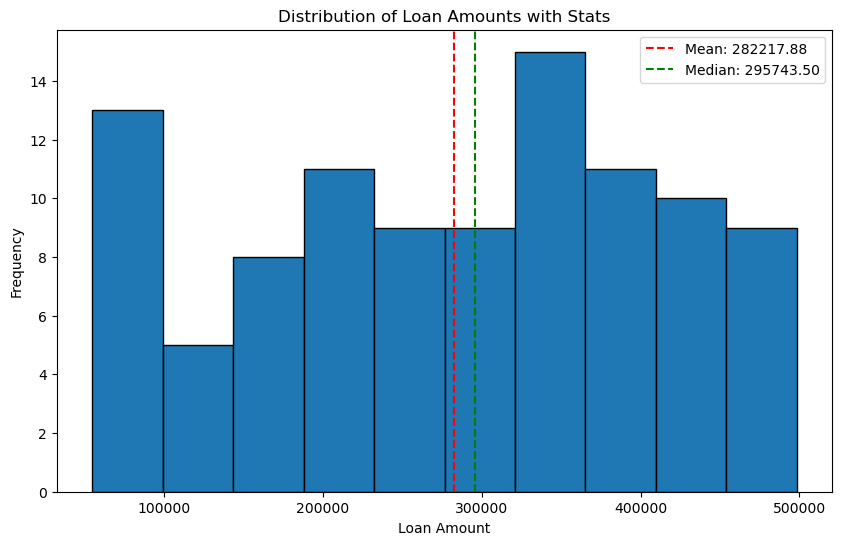

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(loan_data['loan_amount'], bins=10, edgecolor='black')
plt.axvline(loan_mean, color='r', linestyle='--', label=f'Mean: {loan_mean:.2f}')
plt.axvline(loan_median, color='g', linestyle='--', label=f'Median: {loan_median:.2f}')
plt.title('Distribution of Loan Amounts with Stats')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [12]:
 # Hypothesis Testing: Loan Approval by Credit Score
    
import pandas as pd
from scipy.stats import ttest_ind

# Load your data (adjust file paths as needed)
loan_data = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/loans_medium.csv')
customer_data = pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/customers_medium.csv')

# Merge the DataFrames on customer_id
merged_data = pd.merge(loan_data, customer_data, on='customer_id', how='left')

# Hypothesis Testing: Loan Approval by Credit Score
approved_scores = merged_data[merged_data['approval_status'] == 'Approved']['credit_score'].dropna()
rejected_scores = merged_data[merged_data['approval_status'] == 'Rejected']['credit_score'].dropna()

t_stat, p_value = ttest_ind(approved_scores, rejected_scores, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Significant difference in credit scores between approved and rejected loans.")
else:
    print("No significant difference.")

T-statistic: 1.1196278859724889
P-value: 0.26705111172860924
No significant difference.


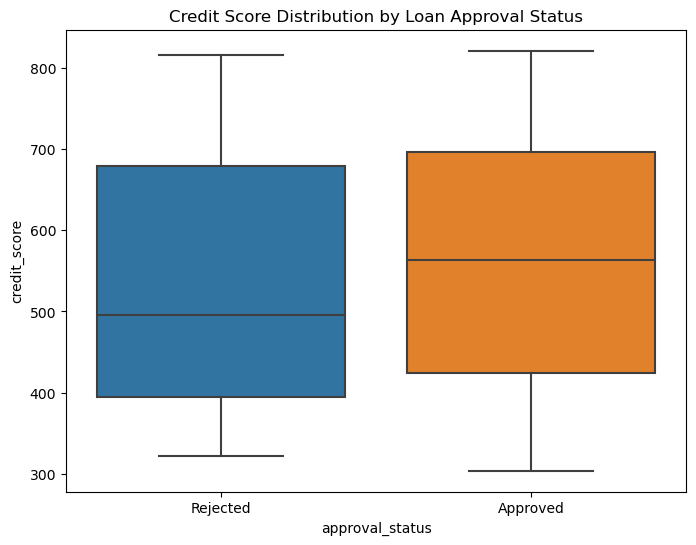

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='approval_status', y='credit_score', data=merged_data)
plt.title('Credit Score Distribution by Loan Approval Status')
plt.show()

In [14]:
# Correlation Analysis: Income vs. Loan Amount

from scipy.stats import pearsonr

merged_data = pd.merge(loan_data, customer_data, on='customer_id')
correlation, p_value = pearsonr(merged_data['income'], merged_data['loan_amount'])
print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: -0.05529173194599742
P-value: 0.5848019887544058


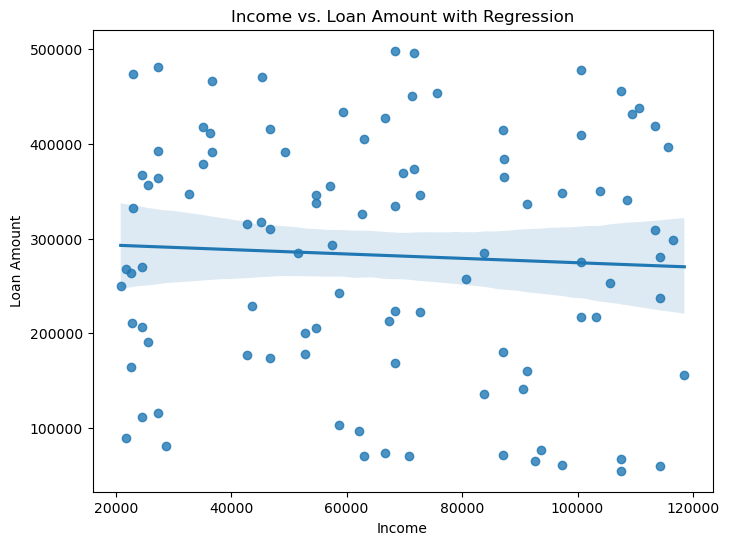

In [15]:
plt.figure(figsize=(8, 6))
sns.regplot(x='income', y='loan_amount', data=merged_data)
plt.title('Income vs. Loan Amount with Regression')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

In [16]:
# ANOVA: Loan Amount by Loan Type

from scipy.stats import f_oneway

groups = [merged_data[merged_data['loan_type'] == lt]['loan_amount'].dropna() 
          for lt in merged_data['loan_type'].unique()]
f_stat, p_value = f_oneway(*groups)
print("F-statistic:", f_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Significant difference in loan amounts by loan type.")

F-statistic: 0.27807015213673963
P-value: 0.8410998172323367


C:\Users\Admin\AppData\Local\Temp\ipykernel_1368\1072549522.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='loan_type', y='loan_amount', data=merged_data, ci='sd')


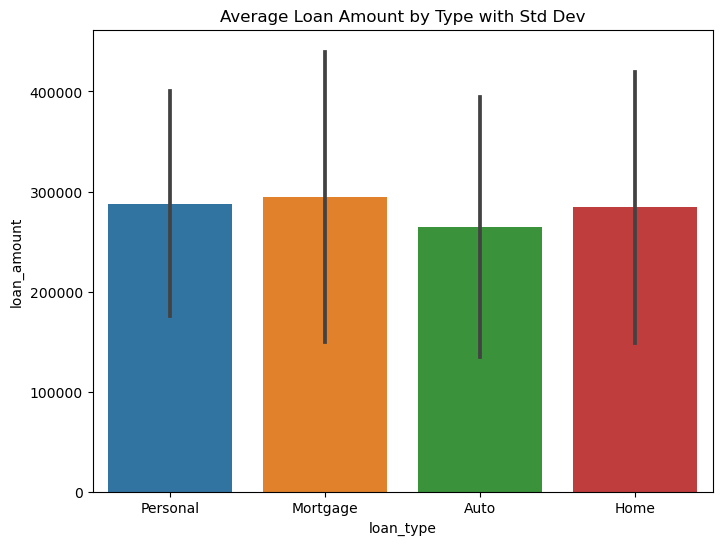

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x='loan_type', y='loan_amount', data=merged_data, ci='sd')
plt.title('Average Loan Amount by Type with Std Dev')
plt.show()